In [10]:
import joblib
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the Model and Dataset for analysis

In [4]:
model = joblib.load("mnist_svm_model.joblib")

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

## Getting Predictions

In [8]:
y_pred = model.predict(X)

## Accuracy Score

In [9]:
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9625


## Classification Report

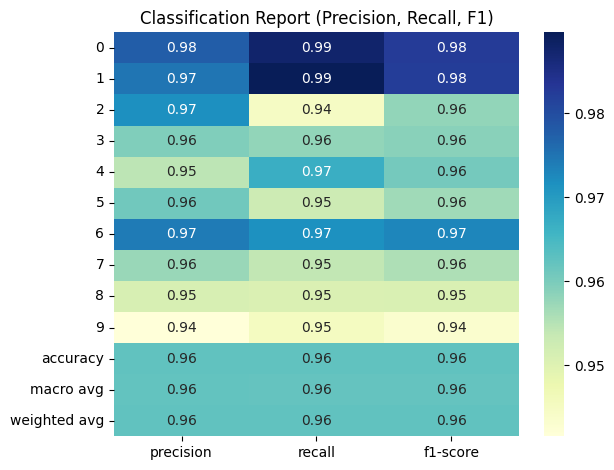

In [15]:
report = classification_report(y, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report (Precision, Recall, F1)")
plt.tight_layout()
plt.show()

## Confusion Matrix

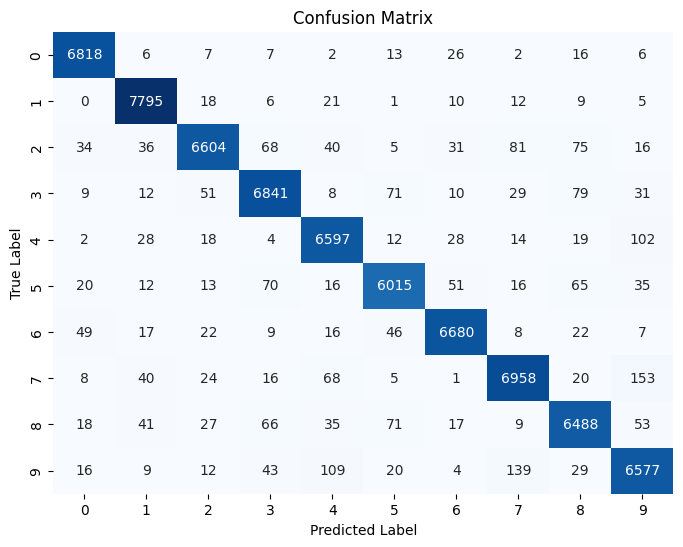

In [16]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Class-Wise Accuracy

In [20]:
correct = (y_pred == y)
class_accuracy = {}
for label in np.unique(y):
    mask = y == label
    class_accuracy[label] = np.mean(correct[mask])

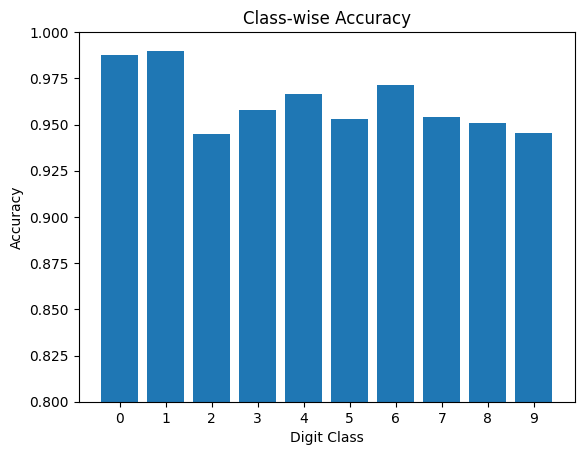

In [21]:

plt.bar(class_accuracy.keys(), class_accuracy.values())
plt.xticks(np.arange(10))
plt.ylim(0.8, 1.0)
plt.title("Class-wise Accuracy")
plt.xlabel("Digit Class")
plt.ylabel("Accuracy")
plt.show()

## Per-Class Error Rates (FP + FN)

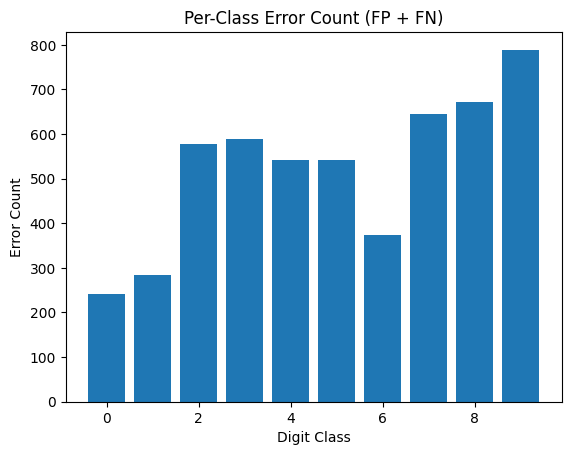

In [37]:
fp_fn = cm.sum(axis=1) + cm.sum(axis=0) - 2 * np.diag(cm)
plt.bar(np.arange(10), fp_fn,)
plt.title("Per-Class Error Count (FP + FN)")
plt.xlabel("Digit Class")
plt.ylabel("Error Count")
plt.show()

## Top-N Misclassified Digits

In [35]:
def show_misclassified(X, y_true, y_pred, N=9):
    misclassified_idx = np.where(y_true != y_pred)[0]
    chosen_idx = np.random.choice(misclassified_idx, N, replace=False)
    plt.figure(figsize=(11, 3))
    for i, idx in enumerate(chosen_idx):
        img = X[idx].reshape(28, 28)
        plt.subplot(1, N, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"True:{y_true[idx]}\nPred:{y_pred[idx]}")
    plt.suptitle(f"Sample Misclassifications (N={N})")
    plt.tight_layout()
    plt.show()


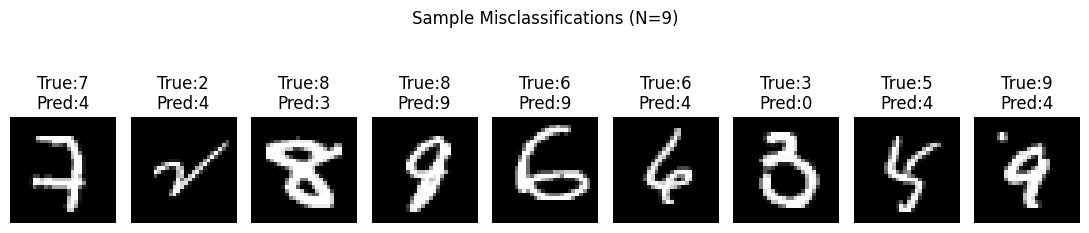

In [36]:
show_misclassified(X, y, y_pred, N=9)